# EMP DATA DATASET
Using the above dataset to evaluate the different linear regression model to predict the churn out rate. 

## BUSINESS OBJECTIVE
* Maximize effieciency
* Minimize churn
* Maximize employee retainability. 

## CONSTRAINTS
* Location .
* Better Salary opportunities. 
* Work Culture. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | Salary_hike    | The Salary increment of the employee                      | Ratio    | Relevant      |
| 2        | Churn_out_rate | The rate at which the employees leave the company.  | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass21\emp_data.csv")
df=df0.copy()
df.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(10, 2)

In [4]:
df.dtypes

Salary_hike       int64
Churn_out_rate    int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Salary_hike       0
Churn_out_rate    0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Salary_hike       10
Churn_out_rate    10
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

Salary_hike       1688.6
Churn_out_rate      72.9
dtype: float64

In [11]:
df.median()

Salary_hike       1675.0
Churn_out_rate      71.0
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_18880\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[1580,   60]], dtype=int64), count=array([[1, 1]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

Salary_hike       8481.822222
Churn_out_rate     105.211111
dtype: float64

In [14]:
df.std()

Salary_hike       92.096809
Churn_out_rate    10.257247
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

Salary_hike       0.858375
Churn_out_rate    0.647237
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

Salary_hike       0.165793
Churn_out_rate   -0.328199
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_18880\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

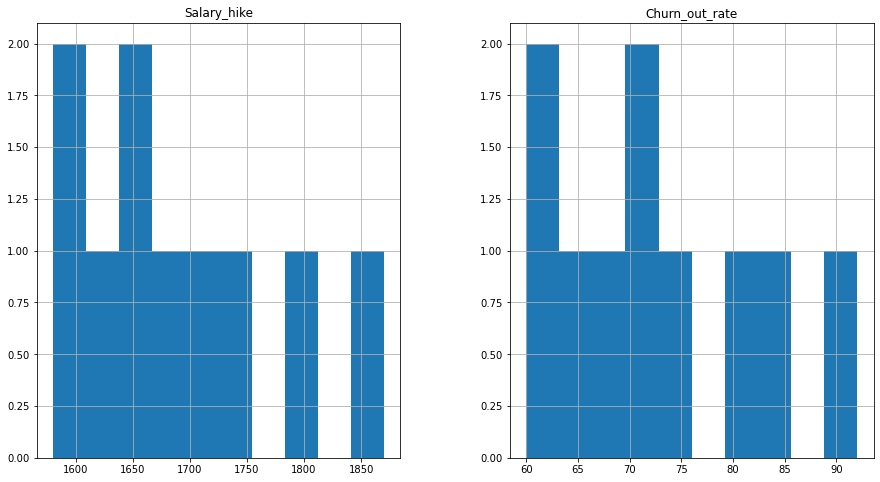

In [17]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


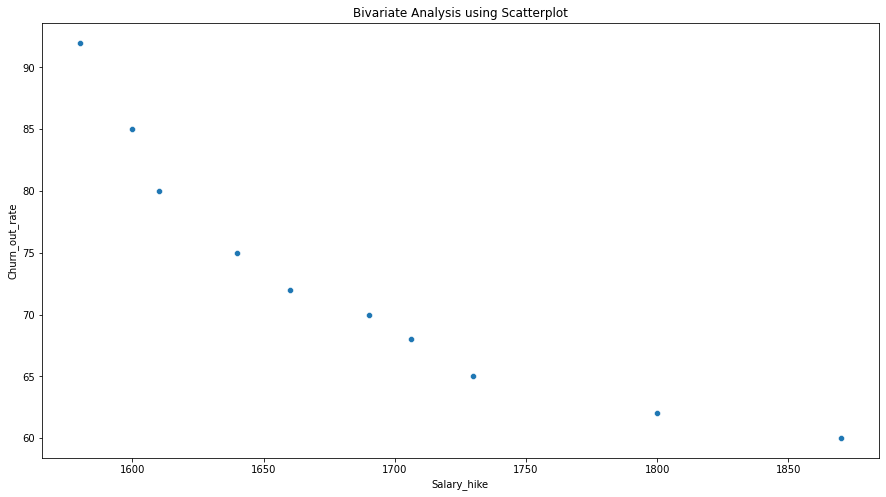

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['Salary_hike'],df['Churn_out_rate'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [19]:
df.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary_hike'>

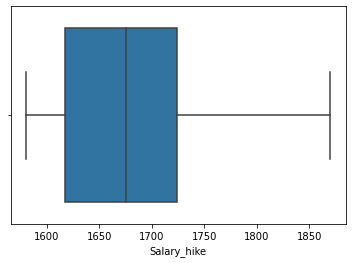

In [20]:
sns.boxplot(df['Salary_hike'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn_out_rate'>

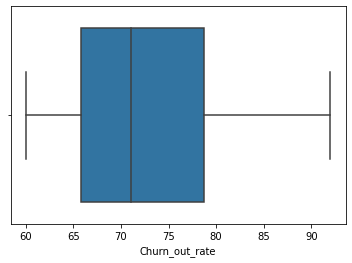

In [21]:
sns.boxplot(df['Churn_out_rate'])

from the boxplots it is evident that there are no outliers in both the variables. 

__CORRELATION CHART__

<AxesSubplot:>

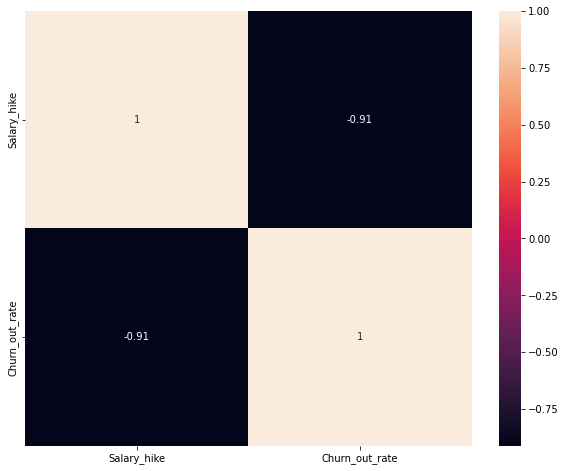

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that the salary hike has a very strong negative correlation with churn out rate.

In [23]:
cov_output = np.cov(df['Salary_hike'], df['Churn_out_rate'])[0, 1]
cov_output

-861.2666666666667

A positive covariance indicates that the two variables tend to move together and with the same sign, a negative covariance indicates that the two variables tend to move in the opposite direction.<br>
__From the covariance value we can infer that the variables move in the opposite direction.__

### EVALUATING DIFFERENT  MODELS FOR  MODEL BUILDING

Importing the library required for evaluating the models. 

In [24]:
import statsmodels.formula.api as smf

__Simple Linear Regression__

Fitting the model

In [25]:
model1 = smf.ols("df['Churn_out_rate'] ~ df['Salary_hike']", data = df).fit()
model1.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     df['Churn_out_rate']   R-squared:                       0.831
Model:                              OLS   Adj. R-squared:                  0.810
Method:                   Least Squares   F-statistic:                     39.40
Date:                  Sat, 05 Nov 2022   Prob (F-statistic):           0.000239
Time:                          00:26:44   Log-Likelihood:                -28.046
No. Observations:                    10   AIC:                             60.09
Df Residuals:                         8   BIC:                             60.70
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           244.3649     27.352      8.934      0.000     181.291     307.439
df['Salary_hike']    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualization to see how well the model fit the data.

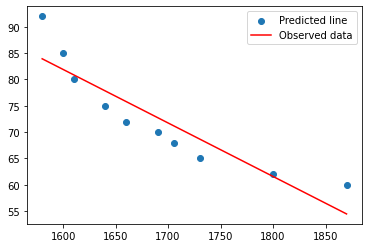

In [26]:
pred1 = model1.predict(pd.DataFrame(df['Salary_hike']))

# Regression Line
plt.scatter(df['Salary_hike'], df['Churn_out_rate'])
plt.plot(df['Salary_hike'], pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [27]:
res1 = df['Churn_out_rate'] - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

3.997528462337797

__Model building on Transformed Data__<br>
* __Log Transformation__

Plotting the scatter plot to understand the correlation and regression line between the transformed variables. 

array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

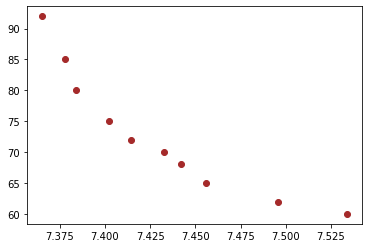

In [28]:
plt.scatter(x = np.log(df['Salary_hike']), y = df['Churn_out_rate'], color = 'brown')
np.corrcoef(np.log(df['Salary_hike']), df['Churn_out_rate']) #correlation

Fitting the model on the regression line

In [29]:
model2 = smf.ols("df['Churn_out_rate'] ~ np.log(df['Salary_hike'])", data = df).fit()
model2.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     df['Churn_out_rate']   R-squared:                       0.849
Model:                              OLS   Adj. R-squared:                  0.830
Method:                   Least Squares   F-statistic:                     44.85
Date:                  Sat, 05 Nov 2022   Prob (F-statistic):           0.000153
Time:                          00:27:11   Log-Likelihood:                -27.502
No. Observations:                    10   AIC:                             59.00
Df Residuals:                         8   BIC:                             59.61
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(df['Salary_hike'])  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualization to see how well the model fit the data. 

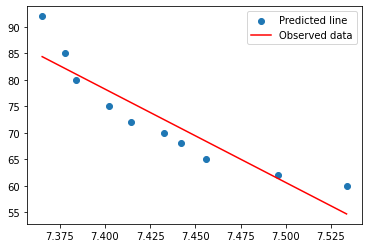

In [30]:
pred2 = model2.predict(pd.DataFrame(df['Salary_hike']))

# Regression Line
plt.scatter(np.log(df['Salary_hike']), df['Churn_out_rate'])
plt.plot(np.log(df['Salary_hike']), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [31]:
res2 = df['Churn_out_rate'] - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

3.7860036130228245

* __Exponential transformation__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

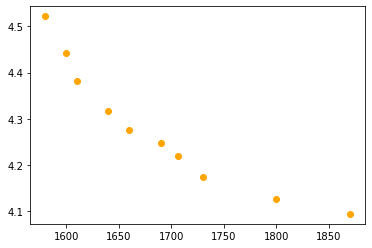

In [32]:
plt.scatter(x = df['Salary_hike'], y = np.log(df['Churn_out_rate']), color = 'orange')
np.corrcoef(df['Salary_hike'], np.log(df['Churn_out_rate'])) #correlation

Fitting the model on the regression line

In [33]:
model3 = smf.ols("np.log(df['Churn_out_rate']) ~ df['Salary_hike']", data = df).fit()
model3.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log(df['Churn_out_rate'])   R-squared:                       0.874
Model:                                      OLS   Adj. R-squared:                  0.858
Method:                           Least Squares   F-statistic:                     55.26
Date:                          Sat, 05 Nov 2022   Prob (F-statistic):           7.38e-05
Time:                                  00:27:26   Log-Likelihood:                 16.511
No. Observations:                            10   AIC:                            -29.02
Df Residuals:                                 8   BIC:                            -28.42
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.6383      0.318     20.902      0.000       5.906       7.371
df['Salary_hike']    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
pred3 = model3.predict(pd.DataFrame(df['Salary_hike']))
pred3_at = np.exp(pred3)

Visualization to see how well the model fit the data.

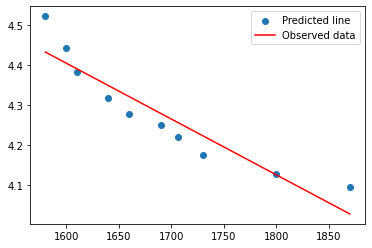

In [35]:
# Regression Line
plt.scatter(df['Salary_hike'], np.log(df['Churn_out_rate']))
plt.plot(df['Salary_hike'], pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [36]:
res3 = df['Churn_out_rate'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

3.541549318821584

* __Polynomial transformation__

Fitting the model on the regression line

In [37]:
model4 = smf.ols("np.log(df['Churn_out_rate']) ~ df['Salary_hike'] + I(df['Salary_hike']*df['Salary_hike'])", data = df).fit()
model4.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log(df['Churn_out_rate'])   R-squared:                       0.984
Model:                                      OLS   Adj. R-squared:                  0.979
Method:                           Least Squares   F-statistic:                     210.1
Date:                          Sat, 05 Nov 2022   Prob (F-statistic):           5.63e-07
Time:                                  00:27:36   Log-Likelihood:                 26.728
No. Observations:                            10   AIC:                            -47.46
Df Residuals:                                 7   BIC:                            -46.55
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   23.1762      2.415      9.597      0.000      17.466      28.887
df['Salary_hike']                           -0.0207      0.003     -7.351      0.000      -0.027      -0.014
I(df['Salary_hike'] * df['Salary_hike'])  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)

Visualization to see how well the model fit the data.

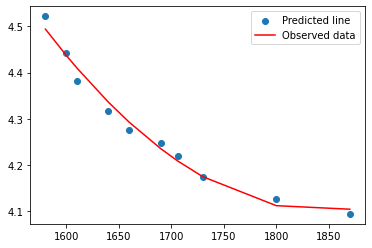

In [39]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = df.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(df['Salary_hike'], np.log(df['Churn_out_rate']))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [40]:
res4 = df['Churn_out_rate']- pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

1.3267899683856126

__Log Transformation on both the variables__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[ 1.        , -0.94291704],
       [-0.94291704,  1.        ]])

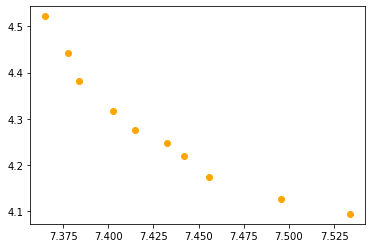

In [41]:
plt.scatter(x = np.log(df['Salary_hike']), y = np.log(df['Churn_out_rate']), color = 'orange')
np.corrcoef(np.log(df['Salary_hike']), np.log(df['Churn_out_rate'])) #correlation

Fitting the model

In [42]:
model5 = smf.ols("np.log(df['Churn_out_rate']) ~ np.log(df['Salary_hike'])", data = df).fit()
model5.summary()

C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log(df['Churn_out_rate'])   R-squared:                       0.889
Model:                                      OLS   Adj. R-squared:                  0.875
Method:                           Least Squares   F-statistic:                     64.13
Date:                          Sat, 05 Nov 2022   Prob (F-statistic):           4.33e-05
Time:                                  00:27:48   Log-Likelihood:                 17.167
No. Observations:                            10   AIC:                            -30.33
Df Residuals:                                 8   BIC:                            -29.73
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    22.2472      2.244      9.916      0.000      17.073      27.421
np.log(df['Salary_hike'])    -2.4180      0.302     -8.008      0.000      -3.114      -1.722
==============================================================================
Omnibus:                        1.962   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.329
Skew:                           0.786   Prob(JB):                        0.515
Kurtosis:                       2.151   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
pred5 = model5.predict(pd.DataFrame(df['Salary_hike']))
pred5_at = np.exp(pred5)

Visualization to see how well the model fit the data.

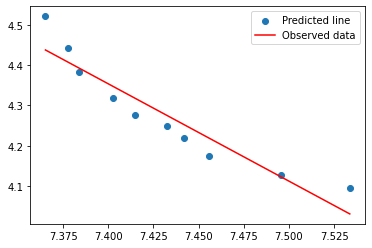

In [44]:
# Regression Line
plt.scatter(np.log(df['Salary_hike']), np.log(df['Churn_out_rate']))
plt.plot(np.log(df['Salary_hike']), pred5, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [45]:
res5 = df['Churn_out_rate'] - pred5_at
res_sqr5 = res5 * res5
mse5 = np.mean(res_sqr5)
rmse5 = np.sqrt(mse5)
rmse5

3.3183282421075986

                   ** COMPARING THE IMPORTANT VALUES FOR ALL THE DIFFERENT MODELS TO SELECT THE BEST MODEL **

|               **OUTPUT**               |               **INPUT**              | **R VALUE** | **R^2 VALUE** | **RMSE VALUE** |
|:--------------------------------------:|:------------------------------------:|:------------|:-------------:|:--------------:|
|Churn_out_rate                           |Salary_hike                        | -0.91        | 0.831         | 3.998         |
|Churn_out_rate                           |log(Salary_hike)                   | -0.92       | 0.849        | 3.786         |
|log(Churn_out_rate)                      |Salary_hike                       | -0.935      | 0.874        | 3.541       |
|log(Churn_out_rate)                      |Salary_hike,Salary_hike^2         |             | 0.984         | 1.326    |
|log(Churn_out_rate)                      |log(Salary_hike)                   |  -0.943         | 0.889       | 3.318       |

#### CONCLUSION
From all the different models the polynomial model has the best values among all the models.<br>
__So from the above information the polynomial model is the best.__